### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("ht_user_metrics_lifestyle.csv")

In [3]:
df

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps,lifestyle
0,82.683797,139.434875,22.398064,20.994012,5.502632,5171.495890,Sedentary
1,77.732942,127.057153,25.150813,25.527475,37.216702,7115.591781,Weight Trainer
2,86.511629,147.315731,19.148256,19.448407,45.000087,7257.693151,Weight Trainer
3,77.550541,129.577004,24.240376,21.401302,37.886069,7129.690411,Weight Trainer
4,68.933106,136.502687,30.726596,28.855230,32.241984,6958.378082,Weight Trainer
...,...,...,...,...,...,...,...
2995,82.056086,140.614679,21.432227,24.162064,41.550757,7283.430137,Weight Trainer
2996,90.113362,144.578567,21.432304,18.346046,40.459149,7110.720548,Weight Trainer
2997,81.907737,148.378812,21.598411,22.797690,5.838148,5153.890411,Sedentary
2998,69.910868,140.814891,26.134180,26.965661,5.176265,5167.194521,Sedentary


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   avg_resting_heartrate  3000 non-null   float64
 1   avg_active_heartrate   3000 non-null   float64
 2   avg_bmi                3000 non-null   float64
 3   avg_vo2                3000 non-null   float64
 4   avg_workout_minutes    3000 non-null   float64
 5   avg_steps              3000 non-null   float64
 6   lifestyle              3000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 164.2+ KB


In [5]:
df.describe(include='all')

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps,lifestyle
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000
unique,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,Cardio Enthusiast
freq,NaN,NaN,NaN,NaN,NaN,NaN,1064
mean,62.266620,119.975708,22.902468,32.351569,35.573140,10211.991552,NaN
std,12.521525,16.910238,4.492680,7.029757,12.472619,2985.154675,NaN
min,45.046490,82.041834,7.592313,10.934276,4.219295,5047.646575,NaN
25%,52.024483,106.580546,19.761279,27.334516,32.626821,7181.889726,NaN
50%,58.526237,117.846432,22.912607,33.212109,36.840635,10839.997260,NaN
75%,70.799247,131.758270,26.005915,37.412472,41.755371,12759.914384,NaN


In [6]:
df.shape

(3000, 7)

In [7]:
df.columns

Index(['avg_resting_heartrate', 'avg_active_heartrate', 'avg_bmi', 'avg_vo2', 'avg_workout_minutes', 'avg_steps', 'lifestyle'], dtype='object')

### Data Visualization

### Univariate Data Exploration

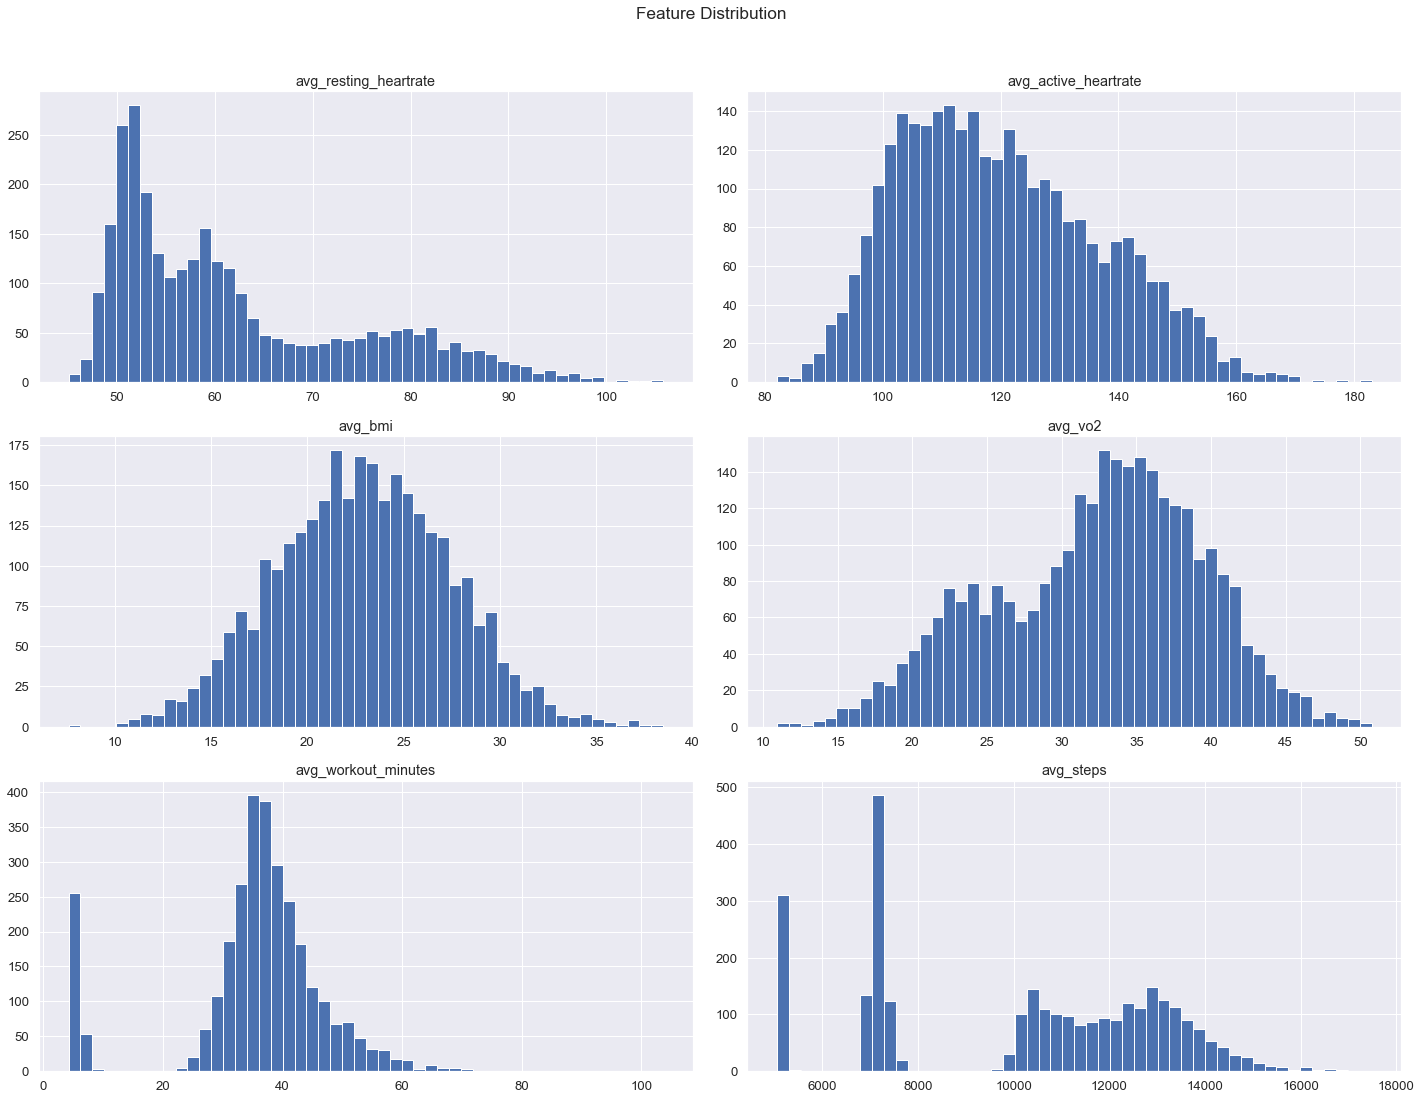

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

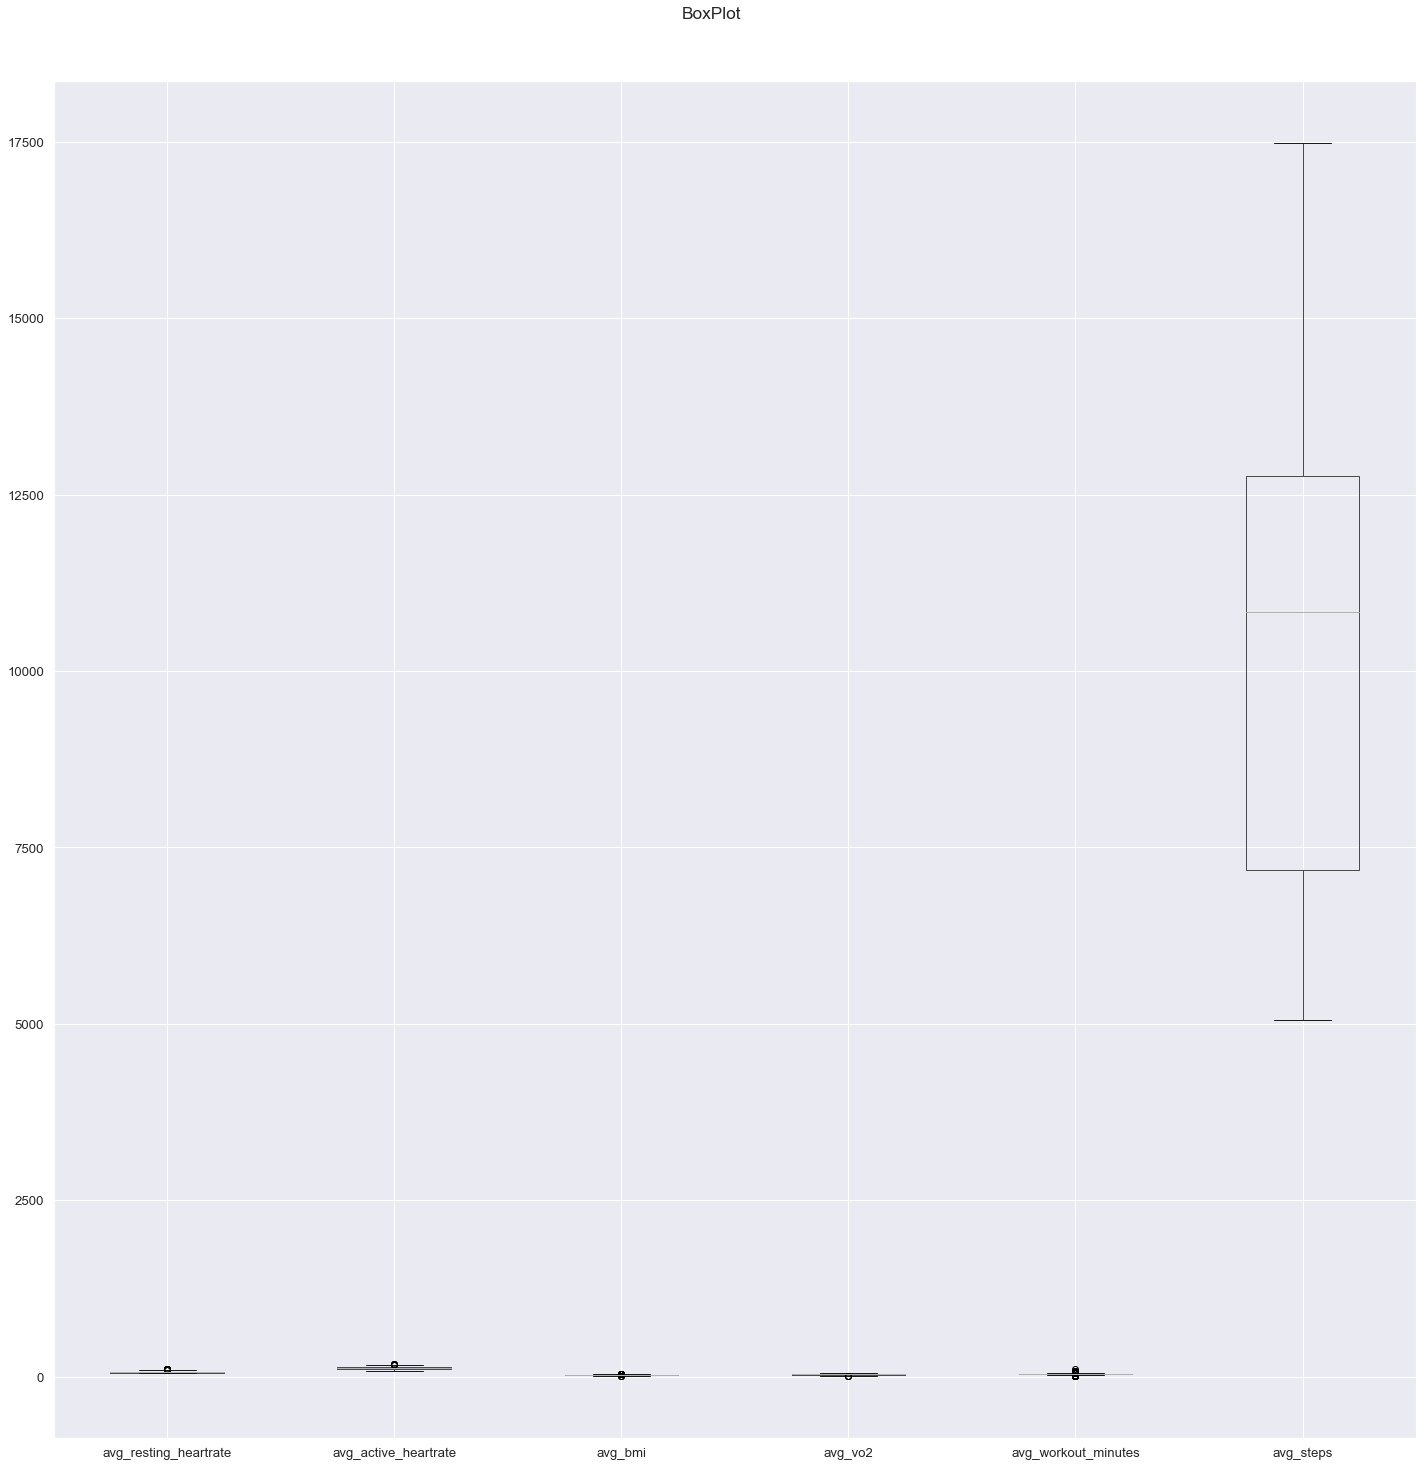

In [9]:
df.boxplot(figsize=(20,20))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Correlation

In [10]:
df.corr()

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps
avg_resting_heartrate,1.000000,0.806261,0.143967,-0.941182,-0.374457,-0.789815
avg_active_heartrate,0.806261,1.000000,0.328879,-0.789361,-0.393310,-0.817233
avg_bmi,0.143967,0.328879,1.000000,-0.127956,-0.377415,-0.453897
avg_vo2,-0.941182,-0.789361,-0.127956,1.000000,0.306123,0.731383
avg_workout_minutes,-0.374457,-0.393310,-0.377415,0.306123,1.000000,0.472424
avg_steps,-0.789815,-0.817233,-0.453897,0.731383,0.472424,1.000000


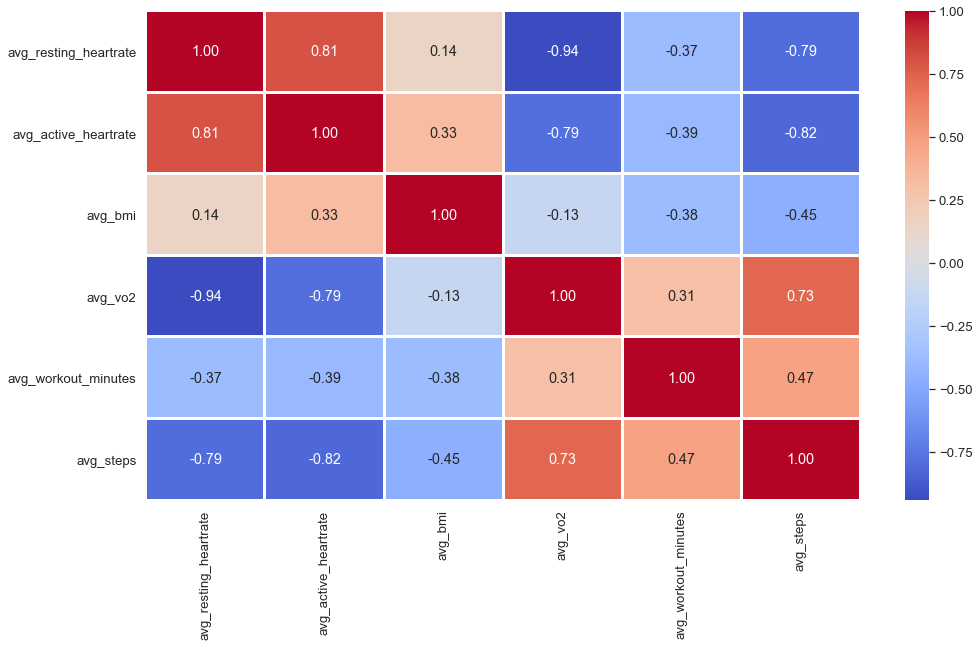

In [11]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Pairplots

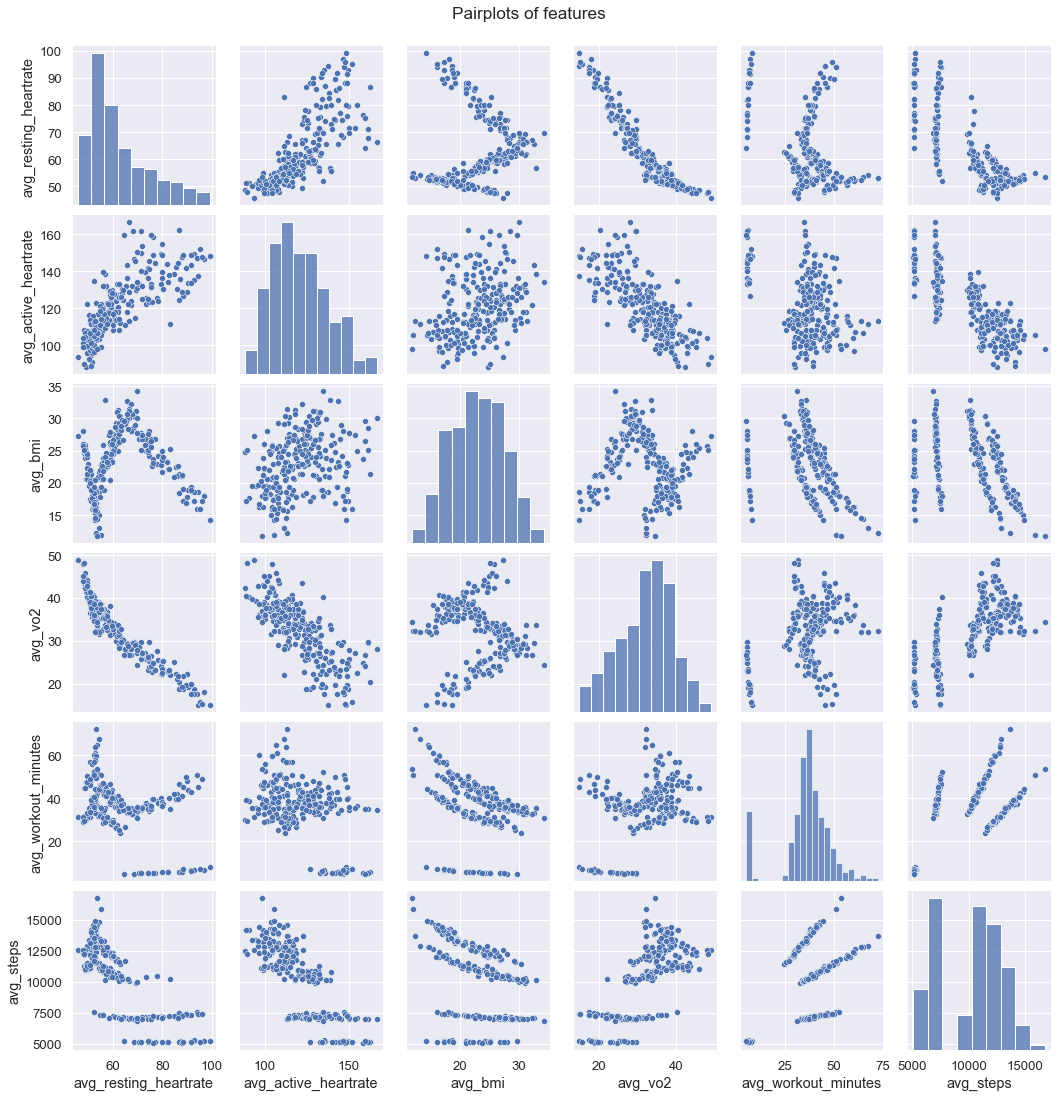

In [12]:
sns.pairplot(df.sample(250))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### Data Preprocessing

### Treat Missing Values

In [13]:
df.isnull().sum()

avg_resting_heartrate    0
avg_active_heartrate     0
avg_bmi                  0
avg_vo2                  0
avg_workout_minutes      0
avg_steps                0
lifestyle                0
dtype: int64

### Replacing values

In [14]:
le = LabelEncoder()

In [15]:
df["lifestyle"] = le.fit_transform(df["lifestyle"])

In [16]:
df.head()

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps,lifestyle
0,82.683797,139.434875,22.398064,20.994012,5.502632,5171.495890,2
1,77.732942,127.057153,25.150813,25.527475,37.216702,7115.591781,3
2,86.511629,147.315731,19.148256,19.448407,45.000087,7257.693151,3
3,77.550541,129.577004,24.240376,21.401302,37.886069,7129.690411,3
4,68.933106,136.502687,30.726596,28.855230,32.241984,6958.378082,3


In [17]:
df["lifestyle"].value_counts()

1    1064
0     859
3     765
2     312
Name: lifestyle, dtype: int64

### Treat Duplicate Values

In [18]:
df.duplicated(keep='first').sum()

0

### Train Test Split

In [19]:
df.head()

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps,lifestyle
0,82.683797,139.434875,22.398064,20.994012,5.502632,5171.495890,2
1,77.732942,127.057153,25.150813,25.527475,37.216702,7115.591781,3
2,86.511629,147.315731,19.148256,19.448407,45.000087,7257.693151,3
3,77.550541,129.577004,24.240376,21.401302,37.886069,7129.690411,3
4,68.933106,136.502687,30.726596,28.855230,32.241984,6958.378082,3


In [20]:
df.columns

Index(['avg_resting_heartrate', 'avg_active_heartrate', 'avg_bmi', 'avg_vo2', 'avg_workout_minutes', 'avg_steps', 'lifestyle'], dtype='object')

In [21]:
df = df[['avg_resting_heartrate', 'avg_active_heartrate', 'avg_bmi','avg_workout_minutes', 
         'avg_steps', 'lifestyle', 'avg_vo2']]

In [22]:
df.head()

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_workout_minutes,avg_steps,lifestyle,avg_vo2
0,82.683797,139.434875,22.398064,5.502632,5171.495890,2,20.994012
1,77.732942,127.057153,25.150813,37.216702,7115.591781,3,25.527475
2,86.511629,147.315731,19.148256,45.000087,7257.693151,3,19.448407
3,77.550541,129.577004,24.240376,37.886069,7129.690411,3,21.401302
4,68.933106,136.502687,30.726596,32.241984,6958.378082,3,28.855230


In [23]:
X = df.iloc[:,0:6]
y = df.iloc[:,6]

In [24]:
X.values, y.values

(array([[  82.68379728,  139.43487473,   22.39806365,    5.50263247,
         5171.49589041,    2.        ],
        [  77.73294229,  127.05715347,   25.15081265,   37.21670181,
         7115.59178082,    3.        ],
        [  86.51162896,  147.31573127,   19.148256  ,   45.00008651,
         7257.69315068,    3.        ],
        ...,
        [  81.90773695,  148.37881155,   21.59841078,    5.83814781,
         5153.89041096,    2.        ],
        [  69.91086843,  140.81489091,   26.13418039,    5.17626546,
         5167.19452055,    2.        ],
        [  97.98210157,  139.56732889,   15.75133025,   52.40329518,
         7559.28493151,    3.        ]]),
 array([20.99401158, 25.52747527, 19.44840652, ..., 22.79769019,
        26.96566092, 12.42725884]))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2250, 6), (750, 6), (2250,), (750,))

### Feature Scaling

In [27]:
X_train

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_workout_minutes,avg_steps,lifestyle
487,58.448991,124.784488,27.585089,39.600605,10588.542466,0
1489,51.966798,104.807627,17.343556,38.679861,13942.536986,1
1094,59.824705,117.379784,27.873088,36.868180,7079.638356,3
438,64.065008,132.642326,30.091839,35.929931,10240.265753,0
748,58.455314,116.603296,22.457771,43.678175,10711.350685,0
...,...,...,...,...,...,...
763,54.774950,128.546780,22.100006,48.140014,11314.109589,0
835,64.499411,116.193187,28.789730,35.647839,7112.860274,3
1653,50.770937,112.290051,22.671061,44.896810,11068.243836,0
2607,76.451872,129.705381,24.862678,5.306249,5139.671233,2


### Model Training

In [28]:
rf = RandomForestRegressor(random_state=0)

In [29]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [30]:
rfpred = rf.predict(X_test)

In [31]:
rfpred[:10]

array([36.05945667, 36.05836772, 38.15066085, 20.52512699, 29.2372859 ,
       37.9991301 , 22.07490766, 32.28052404, 38.70801892, 27.12811123])

In [32]:
rf.score(X_train,y_train)

0.9918879854769652

In [33]:
rf.score(X_test,y_test)

0.9501935658736242

### Tuned Models

In [34]:
rf1 = RandomForestRegressor(random_state=0, n_estimators=10)

In [35]:
rf1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [36]:
rf1pred = rf1.predict(X_test)

In [37]:
rf1pred[:10]

array([36.1770189 , 36.42452977, 37.45049655, 20.08837444, 28.79198654,
       39.6629425 , 23.1725345 , 32.11621275, 40.20596544, 26.68258541])

In [38]:
rf1.score(X_train,y_train)

0.9895334713041394

In [39]:
rf1.score(X_test,y_test)

0.9458692127299508

In [40]:
rf2 = RandomForestRegressor(random_state=0, max_depth=2)

In [41]:
rf2.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [42]:
rf2pred = rf2.predict(X_test)

In [43]:
rf2pred[:10]

array([34.33642921, 34.33642921, 40.86638306, 21.20020353, 27.53447316,
       35.93129591, 21.20020353, 34.33642921, 40.86638306, 27.53447316])

In [44]:
rf2.score(X_train,y_train)

0.8676289461245593

In [45]:
rf2.score(X_test,y_test)

0.8646363652878284

In [46]:
rf3 = RandomForestRegressor(random_state=0, bootstrap=False)

In [47]:
rf3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, random_state=0)

In [48]:
rf3pred = rf3.predict(X_test)

In [49]:
rf3pred[:10]

array([36.36054876, 35.98263606, 37.08696778, 20.87402008, 29.76009704,
       33.96890208, 24.17700881, 32.47286467, 35.21461554, 27.90795398])

In [50]:
rf3.score(X_train,y_train)

1.0

In [51]:
rf3.score(X_test,y_test)

0.9008933320906424